<a href="https://colab.research.google.com/github/MohitPunasiya/EE_769-Introduction-to-ML/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 2 : Classification Models
##Submitted by Mohit Punasiya: 213170006 & Ankur Kumar: 213170001


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

##Are the classes balanced?

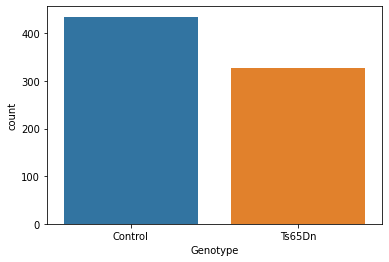

In [ ]:
sns.countplot(x='Genotype',data=df)

In [ ]:
n  = df['Genotype'].value_counts(normalize=True)
print(n*100)
print('We can observe that the classes are balanced in training set')
#https://www.kaggle.com/getting-started/100018 this article talks about criteria to decide classes are balanced or not and suggests 60:40 to consider balanced

Control    57.086614
Ts65Dn     42.913386
Name: Genotype, dtype: float64
We can observe that the classes are balanced in training set


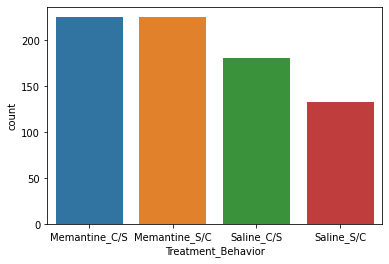

In [ ]:
sns.countplot(x='Treatment_Behavior',data=df)

In [ ]:
m  = df['Treatment_Behavior'].value_counts(normalize=True)
print(m*100)
print('Data is well balanced for this class too.')

Memantine_C/S    29.527559
Memantine_S/C    29.527559
Saline_C/S       23.622047
Saline_S/C       17.322835
Name: Treatment_Behavior, dtype: float64
Data is well balanced for this class too.


##Exploratory data analysis

In [ ]:
corr_matrix = np.abs(df.corr())  #Correlation matrix of data

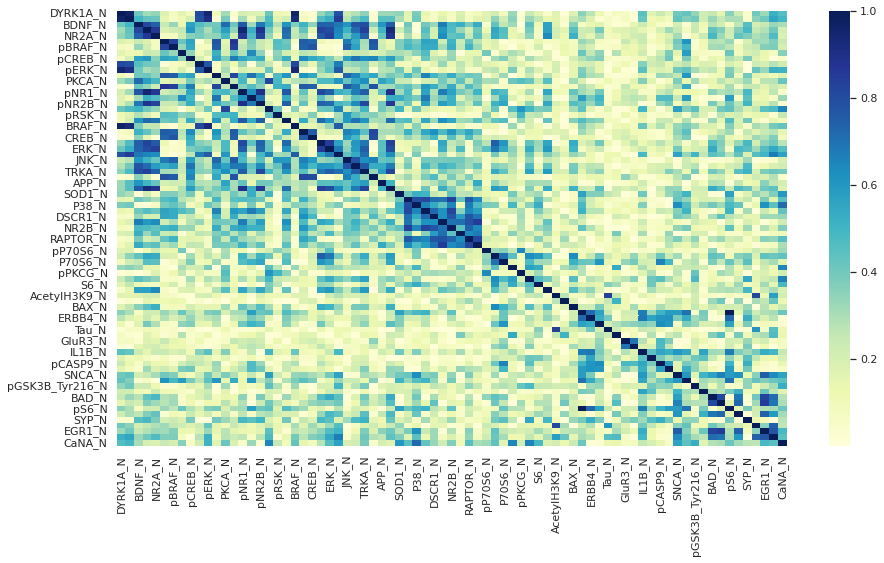

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix,cmap="YlGnBu")
##Due to high number of features heatmap seems messy we can't really get anything out of it
##So to visualise Features Beyond a certain threshold only  we can try setting all other values to zero 

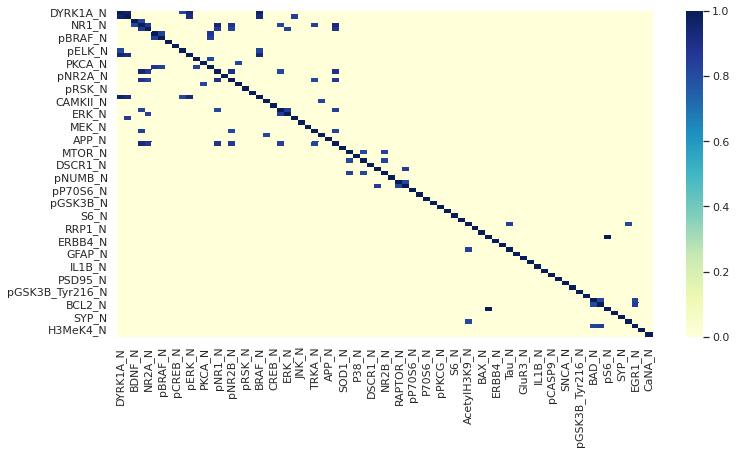

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(np.abs(df.corr())[np.abs(df.corr())>0.8].fillna(value=0),cmap="YlGnBu") 
#To visualise correlated features clearly
#setting all values which are below a certain threshold to zero 
#we used this to quickly visualise how many features we will be lossing while setting a certain threshold

# Ref : https://seaborn.pydata.org/generated/seaborn.heatmap.html 
#To understand heatmap and its application

Filling Missing values

In [ ]:
##we had tried with univariate imputation as well but We get better results with multivariate feature imputation
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df.drop(['Genotype','Treatment_Behavior'],axis = 1))  #fitting to iterative imputer
df_trans = pd.DataFrame(imp.transform(df.drop(['Genotype','Treatment_Behavior'],axis = 1)))  #transforming and imputing the values 

#https://scikit-learn.org/stable/modules/impute.html 
#reading about iterative imputer

In [ ]:
df_trans = pd.concat([df_trans , df[['Genotype','Treatment_Behavior']]],axis = 1) 
#contanation of last two columns and setting columns name
df_trans.columns = df.columns
df_trans.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


Correlation check and Feature elimination

In [ ]:
upper_triangle = pd.DataFrame(np.triu(np.abs(df_trans.corr()),k = 1),index = df_trans.columns[:-2],columns = df_trans.columns[:-2]) #transforming correlation matrix to upper triangle
upper_triangle.head(5)

#reference : https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
#From the above reference we understood how we can extract upper triangle and than use it to get correlated features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,0.0,0.961321,0.407110,0.314795,0.340011,0.182126,0.085401,0.158167,0.082463,0.811398,...,0.223812,0.255974,0.216103,0.358480,0.251624,0.035929,0.335634,0.318127,0.303629,0.457907
ITSN1_N,0.0,0.000000,0.495102,0.428745,0.421034,0.149509,0.068712,0.114789,0.200468,0.796880,...,0.220720,0.341409,0.307867,0.299066,0.323878,0.039384,0.357801,0.404352,0.374469,0.495085
BDNF_N,0.0,0.000000,0.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.112984,0.241762,0.170503,0.070504,0.261622,0.454025,0.284638,0.245891,0.316513,0.304098
NR1_N,0.0,0.000000,0.000000,0.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.100915,0.431328,0.329547,0.227674,0.354048,0.486483,0.339320,0.371601,0.416312,0.205033
NR2A_N,0.0,0.000000,0.000000,0.000000,0.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,0.237932,0.515386,0.360714,0.215495,0.398397,0.377628,0.365133,0.404731,0.495630,0.185840


In [ ]:
"""Creating a function which perform t test on feature and return the t test score"""
def t_test(df,X):
    mean = df.groupby('Genotype')[X].mean()
    std = df.groupby('Genotype')[X].std()
    count = df['Genotype'].value_counts()
    #at index 0 Control & @index 1 Ts65Dn
    t_test = np.abs(mean[0]-mean[1]) / np.sqrt((std[0]**2 /count[0]) + (std[1]**2/count[1]))
    return(t_test)

In [ ]:
# performing T-test on correlated feature and than decide which one to drop
threshold = 0.9
FeatureCorrelated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)] #getting correlated column feature from triangle corr matrix
correlated_feature = []   #to store pair of correlated features
for feature in FeatureCorrelated:
    correlated_feature.append((feature,upper_triangle[upper_triangle[feature]>threshold].index[0])) 
to_be_dropped = [] #to store the feature which will be dropped finally
for feature in correlated_feature:
    t_test1 = t_test(df,feature[0]) #performing t_test on one feature 
    t_test2 = t_test(df,feature[1]) #performing t_test on another feature
    if (t_test2>t_test1) and (feature[1] not in to_be_dropped): #deciding which feature to drop based on t_test score, the one with higher T-test is preferred
        to_be_dropped.append(feature[1])
    else:
        to_be_dropped.append(feature[0])       
print('Features dropped finally :',to_be_dropped)
df_trans.drop(to_be_dropped,axis = 1, inplace = True)
#seven features were dropped based on threshold criteria of 0.9
#https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/
#the above mentioned article talks about t-test and how it can be used to compare features

Features dropped finally : ['ITSN1_N', 'DYRK1A_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'NR1_N', 'pS6_N']


Visualising distribution of samples among classes for correlated features 
It can be seen in above graphs that difference between the means of two groups is more significant in feature "ITSN1_N" 
And based on that we choose to keep ITSN1_N and discard DYRK1A_N the same has been done for all correlated features


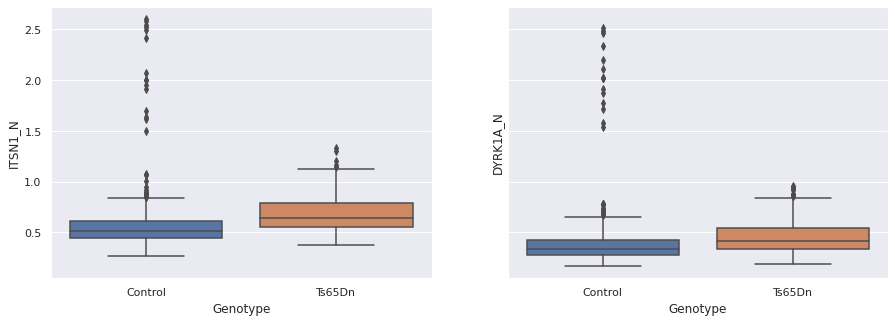

In [ ]:
print('Visualising distribution of samples among classes for correlated features ')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot(ax = axes[0],x = 'Genotype' , y = 'ITSN1_N',data = df ) 
sns.boxplot(ax = axes[1],x = 'Genotype' , y = 'DYRK1A_N',data = df)
print('It can be seen in above graphs that difference between the means of two groups is more significant in feature "ITSN1_N" \nAnd based on that we choose to keep ITSN1_N and discard DYRK1A_N the same has been done for all correlated features')
#Refernce : https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


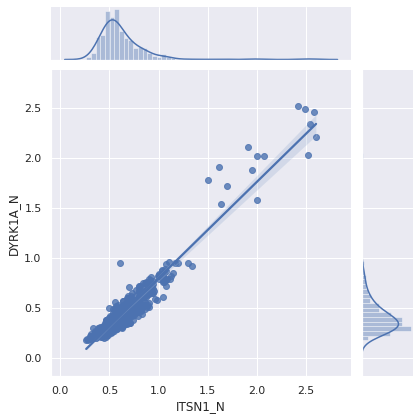

In [ ]:
#Visualising correlated features and there correlation
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.JointGrid(x="ITSN1_N", y="DYRK1A_N", data=df)
g = g.plot(sns.regplot, sns.distplot)

#https://seaborn.pydata.org/generated/seaborn.jointplot.html  reference
#Reference from sample code 
##underlying assumption that data points are normally distributed while calculating t-test is true this can be seen from distribution plots on margin

In [ ]:
df_trans.head(5)

,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.430175,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,...,0.122652,0.107515,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.411770,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,...,0.116682,0.109055,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.418309,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,...,0.118508,0.108598,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.358626,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,...,0.132781,0.118362,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.358802,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,...,0.129954,0.118030,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [ ]:
X_train, y1_train,y2_train = df_trans.drop(['Genotype', 'Treatment_Behavior'],axis = 1), df_trans['Genotype'],df_trans['Treatment_Behavior']  #here i have done one hot bit encoding of target variable also

In [ ]:
X_train.head()

,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.430175,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,...,0.831557,0.188852,0.122652,0.107515,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.411770,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,...,0.849270,0.200404,0.116682,0.109055,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.418309,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,...,0.846709,0.193685,0.118508,0.108598,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.358626,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,...,0.833277,0.192112,0.132781,0.118362,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.358802,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,...,0.878668,0.205604,0.129954,0.118030,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


##Performance Metrics 

We will use accuracy, F1 score, balanced accuracy, AUC
As classes seemed to be well balanced 

*   Accuracy
*   Precision 

*   Recall
*   F1 Score


*   AUC ROC metric


And to get all this, We will use confusion metric and classification metric

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#artical on multiclass performace metric https://www.datascienceblog.net/post/machine-learning/performance-measures-multi-class-problems/

##Binary Classification Models

Elastic Net Logistics Regression

In [ ]:
import warnings   #to hide convergence warning while fitting model 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'C': (0.01,1,10),               #making dictionary of parameters for grid search
         'l1_ratio': np.arange(0,1.1,0.1)}
gs_ElasticNet = GridSearchCV(LogisticRegression(penalty= 'elasticnet',max_iter=1500,solver = 'saga'),   #running a grid search to find best set of parameters with 5 fold cross validation
                      param_grid=params, 
                      scoring='accuracy', #the performance parameter used here is accuracy
                      cv=5, verbose = 1) 
gs_ElasticNet.fit(X_train, y1_train)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1500, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': (0.01, 1, 10),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy', verbose=1)

In [ ]:
b = gs_ElasticNet.best_params_
L1_penalty = b['l1_ratio']*(1/(b['C']))
print('L1_penalty',L1_penalty)
L2_penalty = (1-b['l1_ratio'])*(1/b['C'])
print('L2_penalty',L2_penalty)
print('Best score(accuracy):' , gs_ElasticNet.best_score_)
print('BestParameter',gs_ElasticNet.best_params_)

L1_penalty 1.0
L2_penalty 0.0
Best score(accuracy): 0.7702614379084968
BestParameter {'C': 1, 'l1_ratio': 1.0}


Neural Net

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
params = [{'hidden_layer_sizes': [30,100,120],                        #making dictionary of parameters for grid search
         'alpha': [0,0.0001,0.001,0.01,0.1]}]
gs_NeuralNet = GridSearchCV(MLPClassifier(max_iter=1000),                      #running a grid search to find best set of parameters with 5 fold cross validation
                           param_grid=params, 
                           scoring='accuracy',                                 #the performance parameter used here is accuracy
                           cv=5) 
gs_NeuralNet.fit(X_train, y1_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.01, 0.1],
                          'hidden_layer_sizes': [30, 100, 120]}],
             scoring='accuracy')

In [ ]:
print('Best parameters :' , gs_NeuralNet.best_params_)
print('Best Score : ' , gs_NeuralNet.best_score_)

Best parameters : {'alpha': 0.0001, 'hidden_layer_sizes': 100}
Best Score :  0.6442466460268317


SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': [ 'rbf', 'sigmoid']} 
gs_SVC = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
gs_SVC.fit(X_train,y1_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=1)

In [ ]:
print('BestParameters:', gs_SVC.best_params_)
print('BestScore:',gs_SVC.best_score_)

BestParameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
BestScore: 0.7610595115239078


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [5,8,10,20], 'max_depth': np.arange(5,15,2),'max_features' :("auto", "sqrt")} 
gs_rfc = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=1)
gs_rfc.fit(X_train,y1_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13]),
                         'max_features': ('auto', 'sqrt'),
                         'n_estimators': [5, 8, 10, 20]},
             verbose=1)

In [ ]:
print('Best Parameters:',gs_rfc.best_params_)
print('BestScore:',gs_rfc.best_score_)


Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 5}
BestScore: 0.684907120743034


##Multiclass Classification models

Logistics regression

In [ ]:
params = [{'C': (0.01,1,10),               #making dictionary of parameters for grid search
         'l1_ratio': np.arange(0,1.1,0.2)}]
gs_MultiClass_LR = GridSearchCV(LogisticRegression(penalty= 'elasticnet',max_iter=1500,solver = 'saga',multi_class='ovr'),   #running a grid search to find best set of parameters with 5 fold cross validation
                      param_grid=params, 
                      scoring='accuracy', #the performance parameter used here is accuracy
                      cv=5, verbose = 1) 
gs_MultiClass_LR.fit(X_train, y2_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1500, multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid=[{'C': (0.01, 1, 10),
                          'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])}],
             scoring='accuracy', verbose=1)

In [ ]:
print('Best Parameters:',gs_MultiClass_LR.best_params_)
print('Best Scores: ',gs_MultiClass_LR.best_score_)
b = gs_MultiClass_LR.best_params_
L1_penalty = b['l1_ratio']*(1/(b['C']))
print('L1_penalty',L1_penalty)
L2_penalty = (1-b['l1_ratio'])*(1/b['C'])
print('L2_penalty',L2_penalty)

Best Parameters: {'C': 10, 'l1_ratio': 1.0}
Best Scores:  0.6889146886824906
L1_penalty 0.1
L2_penalty 0.0


Neural Net

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
params = {'hidden_layer_sizes': [100,120,200],                          #making dictionary of parameters for grid search
         'alpha': [0,0.0001,0.01,0.1,1]}
gs_NeuralNet_multiclass = GridSearchCV(MLPClassifier(max_iter=3000),              #running a grid search to find best set of parameters with 5 fold cross validation
                      param_grid=params, 
                      scoring='accuracy',                                         #the performance parameter used here is accuracy
                      cv=5,verbose = 1) 
gs_NeuralNet_multiclass.fit(X_train, y2_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=3000),
             param_grid={'alpha': [0, 0.0001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [100, 120, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
print('Best Parameters: ',gs_NeuralNet_multiclass.best_params_)
print('Best Score: ',gs_NeuralNet_multiclass.best_score_)

Best Parameters:  {'alpha': 0.0001, 'hidden_layer_sizes': 100}
Best Score:  0.7348727210182318


SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100,120], 'gamma': [1,0.1,0.0001], 'kernel': ['rbf', 'sigmoid']} 
gs_SVC_multiclass = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
gs_SVC_multiclass.fit(X_train,y2_train)
gs_SVC_multiclass.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
print('BestScore: ', gs_SVC_multiclass.best_score_)
print('Best Parameter: ',gs_SVC_multiclass.best_params_)

BestScore:  0.6980736154110767
Best Parameter:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [5,10,20,60], 'max_depth': np.arange(2,20,2),'max_features' :("auto", "sqrt")} 
gs_rfc_multiclass = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=1)
gs_rfc_multiclass.fit(X_train,y2_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'max_features': ('auto', 'sqrt'),
                         'n_estimators': [5, 10, 20, 60]},
             verbose=1)

In [ ]:
print(gs_rfc_multiclass.best_params_)
print(gs_rfc_multiclass.best_score_)

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}
0.6720330237358102


##Testing

data preparation

In [ ]:
df_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')

In [ ]:
df_testReady = pd.DataFrame(imp.transform(df_test.drop(['Genotype','Treatment_Behavior'],axis = 1)))  #transforming and imputing the values
df_testReady = pd.concat([df_testReady , df_test[['Genotype','Treatment_Behavior']]],axis = 1)
df_testReady.columns = df_test.columns
df_testReady.drop(to_be_dropped,axis = 1,inplace = True ) #dropping correlated features

In [ ]:
X_test, y1_test , y2_test = df_testReady.drop(['Genotype', 'Treatment_Behavior'],axis = 1), df_testReady['Genotype'], df_testReady['Treatment_Behavior']
#preparing input and target variable

Binary class

In [ ]:
'''Making prediction on best model with accuracy as performance metric we see that SVM and Logistic regression performs best'''
print("Accuracy of various binary classification models on validation data were : \n Logistic Regression:{} \n Neural Net: {} \n SVM:{} \n Random Forest Classifier:{}".format(gs_ElasticNet.best_score_,gs_NeuralNet.best_score_,gs_SVC.best_score_,gs_rfc.best_score_))


Accuracy of various binary classification models on validation data were : 
 Logistic Regression:0.7702614379084968 
 Neural Net: 0.6442466460268317 
 SVM:0.7610595115239078 
 Random Forest Classifier:0.684907120743034


In [ ]:
print('fitting best model on test data \nfor SVM')
predictions2  = gs_SVC.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions2))
print('Classification report :\n',classification_report(y1_test,predictions2))

fitting best model on test data 
for SVM
Confusion Matrix: 
 [[112  23]
 [ 10  80]]
Classification report :
               precision    recall  f1-score   support

     Control       0.92      0.83      0.87       135
      Ts65Dn       0.78      0.89      0.83        90

    accuracy                           0.85       225
   macro avg       0.85      0.86      0.85       225
weighted avg       0.86      0.85      0.85       225



In [ ]:
predictions3  = gs_ElasticNet.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions3))
print('Classification report :\n',classification_report(y1_test,predictions3))

Confusion Matrix: 
 [[107  28]
 [ 14  76]]
Classification report :
               precision    recall  f1-score   support

     Control       0.88      0.79      0.84       135
      Ts65Dn       0.73      0.84      0.78        90

    accuracy                           0.81       225
   macro avg       0.81      0.82      0.81       225
weighted avg       0.82      0.81      0.81       225



In [ ]:
model_ = [gs_SVC,gs_ElasticNet,gs_NeuralNet,gs_rfc]
model_name_ = ["SVM","Logistic Regression","Neural Network","Random Forest Classifier"]
print('Test Data Performace')
for i,model in enumerate(model_):
  prediction_ = model.predict(X_test)
  accuracy = accuracy_score(y1_test,prediction_)
  F1_score = f1_score(y1_test,prediction_,average='weighted')
  AUC = roc_auc_score(y1_test.replace(['Control', 'Ts65Dn'], [0,1]),pd.DataFrame(model.predict(X_test)).replace(['Control', 'Ts65Dn'], [0,1]))
  print(model_name_[i],'\nAccuracy: ',accuracy,'\tF1_score',F1_score,'\tAUC-ROC-score',AUC,'\n')

Test Data Performace
SVM 
Accuracy:  0.8533333333333334 	F1_score 0.8545634160601602 	AUC-ROC-score 0.8592592592592593 

Logistic Regression 
Accuracy:  0.8133333333333334 	F1_score 0.8149645618556701 	AUC-ROC-score 0.8185185185185186 

Neural Network 
Accuracy:  0.7822222222222223 	F1_score 0.783868685439366 	AUC-ROC-score 0.7833333333333333 

Random Forest Classifier 
Accuracy:  0.6311111111111111 	F1_score 0.6283090920473279 	AUC-ROC-score 0.6092592592592594 



Multiclass 

In [ ]:
print("Accuracy of various multiclass classification models : \n Logistic Regression:{} \n Neural Net: {} \n SVM:{} \n Random Forest Classifier:{}".format(gs_MultiClass_LR.best_score_,gs_NeuralNet_multiclass.best_score_,gs_SVC_multiclass.best_score_,gs_rfc_multiclass.best_score_))

Accuracy of various multiclass classification models : 
 Logistic Regression:0.6889146886824906 
 Neural Net: 0.7348727210182318 
 SVM:0.6980736154110767 
 Random Forest Classifier:0.6720330237358102


In [ ]:
predictions7 = gs_SVC_multiclass.predict(X_test)
print('Confusion Matrix : \n',confusion_matrix(y2_test,predictions7))
print('Classification Report : \n',classification_report(y2_test,predictions7))

Confusion Matrix : 
 [[35  0 25  0]
 [ 0 51  0  9]
 [23  0 37  0]
 [ 0 15  0 30]]
Classification Report : 
                precision    recall  f1-score   support

Memantine_C/S       0.60      0.58      0.59        60
Memantine_S/C       0.77      0.85      0.81        60
   Saline_C/S       0.60      0.62      0.61        60
   Saline_S/C       0.77      0.67      0.71        45

     accuracy                           0.68       225
    macro avg       0.69      0.68      0.68       225
 weighted avg       0.68      0.68      0.68       225



In [ ]:
predictions4 = gs_MultiClass_LR.predict(X_test)
print(classification_report(y2_test,predictions4))

               precision    recall  f1-score   support

Memantine_C/S       0.68      0.70      0.69        60
Memantine_S/C       0.97      0.95      0.96        60
   Saline_C/S       0.69      0.67      0.68        60
   Saline_S/C       0.93      0.96      0.95        45

     accuracy                           0.81       225
    macro avg       0.82      0.82      0.82       225
 weighted avg       0.81      0.81      0.81       225



In [ ]:
model_ = [gs_SVC_multiclass,gs_MultiClass_LR,gs_NeuralNet_multiclass,gs_rfc_multiclass]
model_name_ = ["SVM","Logistic Regression","Neural Network","Random Forest Classifier"]
from sklearn.preprocessing import label_binarize
y_ = label_binarize(y2_test,classes=['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'])


print('Test Data Performace')
for i,model in enumerate(model_):
  prediction_ = model.predict(X_test)
  accuracy = accuracy_score(y2_test,prediction_)
  F1_score = f1_score(y2_test,prediction_,average='weighted')
  y__ = label_binarize(prediction_,classes=['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'])
  auc_score = roc_auc_score(y_,y__)
  print(model_name_[i],'\nAccuracy: ',accuracy,'\tF1_score',F1_score,'\tROC_AUC',auc_score,'\n')

Test Data Performace
SVM 
Accuracy:  0.68 	F1_score 0.6786708830054203 	ROC_AUC 0.7856060606060605 

Logistic Regression 
Accuracy:  0.8088888888888889 	F1_score 0.8088706917139651 	ROC_AUC 0.8766414141414142 

Neural Network 
Accuracy:  0.7111111111111111 	F1_score 0.710748277621469 	ROC_AUC 0.8070707070707072 

Random Forest Classifier 
Accuracy:  0.6311111111111111 	F1_score 0.631951261543452 	ROC_AUC 0.7551767676767677 



##Feature Importance

In [ ]:
'''Feature importance with random forest feature_importance_ attribute'''
#Correlated features are dropped Before hand,and than feature importance has been checked for remaining features
estimator = gs_rfc.best_estimator_
estimator.fit(X_train, y1_train)
df_feature_importance = pd.DataFrame(estimator.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance
#reference : https://machinelearningmastery.com/calculate-feature-importance-with-python/

,feature importance
APP_N,0.113154
GluR3_N,0.057698
S6_N,0.053104
P38_N,0.051279
pNUMB_N,0.037445
...,...
pBRAF_N,0.000832
pP70S6_N,0.000410
SNCA_N,0.000000
pNR2A_N,0.000000


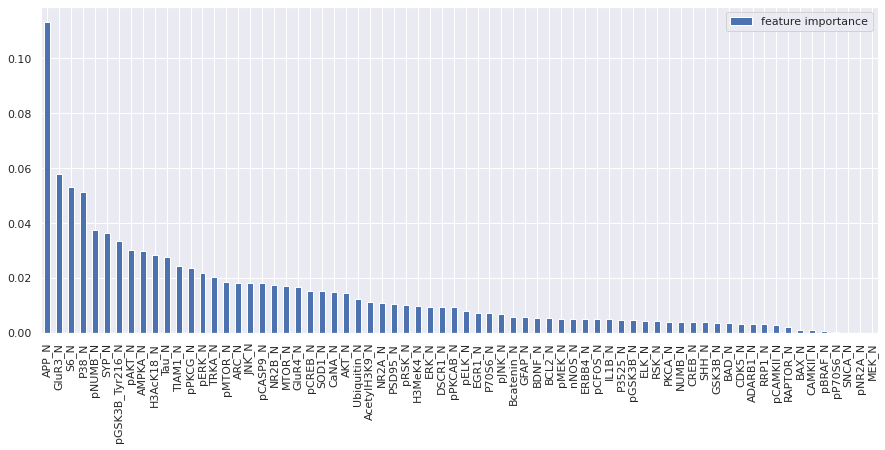

In [ ]:
df_feature_importance.plot(kind='bar',figsize = (15,6))

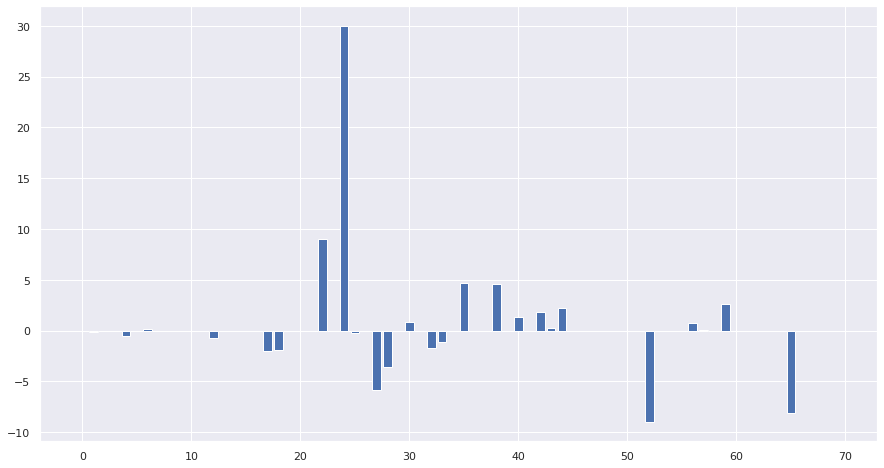

In [ ]:
'''feature importance with Logistics regression importance attribute'''
model = gs_ElasticNet.best_estimator_
model.fit(X_train, y1_train)
importance = model.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### positive scores indicates features that predicts class 1, whereas the negative scores indicate a feature that predicts class 0

##Recursive Feature Elimination

With Random Forest as estimator

Optimal number of features : 39


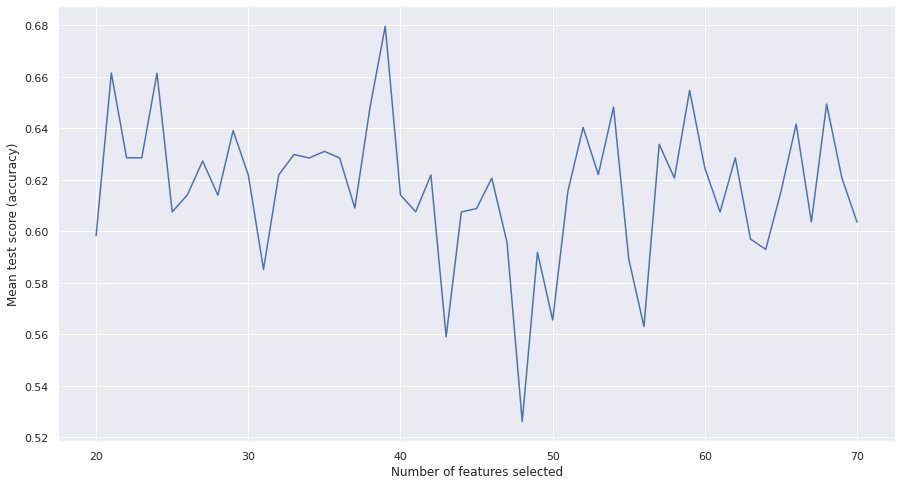

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import StratifiedKFold
min_features_to_select =20             #Minimum number of features to consider
rfecv_ = RFECV(
    estimator=gs_rfc.best_estimator_, #passing the best estimator from previous grid search
    step=1,
    cv=5,#StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select)
rfecv_.fit(X_train, y1_train)

print("Optimal number of features : %d" % rfecv_.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score (accuracy)")
plt.plot(range(min_features_to_select, len(rfecv_.grid_scores_) + min_features_to_select),rfecv_.cv_results_['mean_test_score'])
plt.show()
 
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html

In [ ]:
print("Optimal number of features : %d" % rfecv_.n_features_)
print('Accuracy after Feature Elimination',rfecv_.cv_results_['mean_test_score'].max())
print('Accuracy Before Feature Elimination',gs_rfc.best_score_)

Optimal number of features : 39
Accuracy after Feature Elimination 0.6797041623667011
Accuracy Before Feature Elimination 0.684907120743034


In [ ]:
print('Features Eliminated :\n',list(X_train.columns[np.where(rfecv_.support_ == False)[0]]))
print('Features used : \n',list(X_train.columns[rfecv_.support_]))# [feature for feature in X_train.columns if feature not in rfecv.support_])

Features Eliminated :
 ['BDNF_N', 'pBRAF_N', 'pMEK_N', 'pRSK_N', 'AKT_N', 'CAMKII_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'Bcatenin_N', 'AMPKA_N', 'NR2B_N', 'RAPTOR_N', 'TIAM1_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'CDK5_N', 'AcetylH3K9_N', 'RRP1_N', 'ERBB4_N', 'nNOS_N', 'GFAP_N', 'P3525_N', 'SNCA_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'EGR1_N', 'H3MeK4_N']
Features used : 
 ['NR2A_N', 'pAKT_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'pNUMB_N', 'pP70S6_N', 'pPKCG_N', 'S6_N', 'ADARB1_N', 'BAX_N', 'ARC_N', 'Tau_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'pCASP9_N', 'PSD95_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SYP_N', 'H3AcK18_N', 'CaNA_N']


With Logistics regressor as estimator

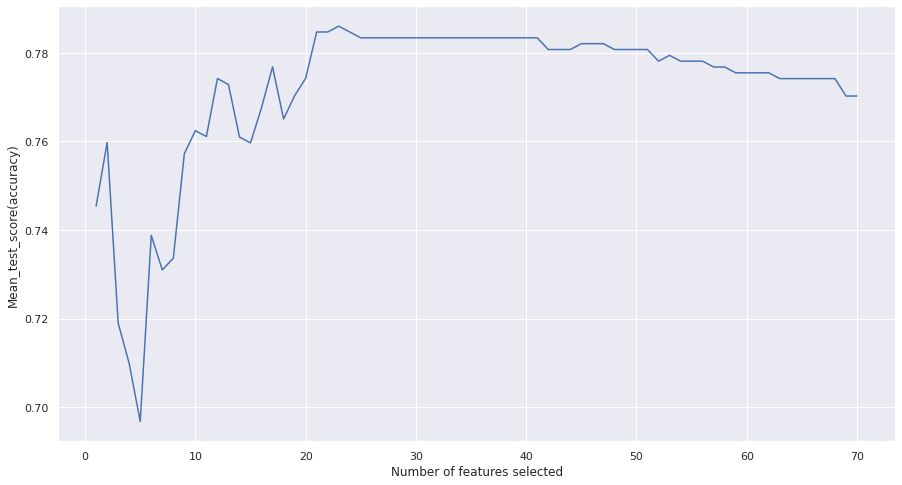

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
min_features_to_select =1             #Minimum number of features to consider
rfecv = RFECV(
    estimator=gs_ElasticNet.best_estimator_, #passing the best estimator from previous grid search
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y1_train) #fitting on the model

plt.figure() # Plotting each folds mean accuracy against no of feature used
plt.xlabel("Number of features selected")
plt.ylabel("Mean_test_score(accuracy)")
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),rfecv.cv_results_['mean_test_score'])
plt.show()
 
#reference https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)
print('Accuracy after Feature Elimination',rfecv.cv_results_['mean_test_score'].max())
print('Accuracy Before Feature Elimination',gs_ElasticNet.best_score_)

Optimal number of features : 23
Accuracy after Feature Elimination 0.7860251117991056
Accuracy Before Feature Elimination 0.7702614379084968


In [ ]:
print('Features Eliminated :\n',list(X_train.columns[np.where(rfecv.support_ == False)[0]]))
print('Features used : \n',list(X_train.columns[rfecv.support_]))# [feature for feature in X_train.columns if feature not in rfecv.support_])

Features Eliminated :
 ['BDNF_N', 'pAKT_N', 'pBRAF_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR2A_N', 'pRSK_N', 'AKT_N', 'CAMKII_N', 'CREB_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'RSK_N', 'SOD1_N', 'pMTOR_N', 'AMPKA_N', 'RAPTOR_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N', 'CDK5_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'PSD95_N', 'SNCA_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
Features used : 
 ['NR2A_N', 'pCAMKII_N', 'pPKCAB_N', 'ELK_N', 'ERK_N', 'TRKA_N', 'APP_N', 'Bcatenin_N', 'MTOR_N', 'P38_N', 'DSCR1_N', 'NR2B_N', 'pNUMB_N', 'TIAM1_N', 'P70S6_N', 'pPKCG_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'GluR3_N', 'pCASP9_N', 'Ubiquitin_N', 'SYP_N']


##Observation


Performance on test data
#For Binary class

SVM
Accuracy:  0.853 ,	F1_score: 0.854  	

Logistic Regression 
Accuracy:  0.813 ,	F1_score: 0.815  	

Neural Network 
Accuracy:  0.777 ,	F1_score: 0.78  	

Random Forest Classifier 
Accuracy:  0.751,	F1_score: 0.751 	             

#For MultiClass 
SVM 
Accuracy:  0.68 ,	            F1_score: 0.6786  

Logistic Regression 
Accuracy:  0.791    ,        	F1_score: 0.7910 

Neural Network 
Accuracy:  0.751 	 ,           F1_score: 0.7507  

Random Forest Classifier 
Accuracy:  0.72 	 ,           F1_score: 0.7191




*   For Binary class SVM performs well, and for multiclass Neural network performs well, while Logistic regression seem to perform well on both and random forest perform OK in both cases

*   Best models are SVM with parameters  {'alpha': 0.0001, 'hidden_layer_sizes': 200}, Neural Network with parameters {'alpha': 0.001, 'hidden_layer_sizes': 30} & Logistic Regression {'C': 1, 'l1_ratio': 1.0}








Following are some comments that we can make observing the results:


-Data provided is well distributed among classes which is evident through precision and recall

-Removing correlated features improves model performance on test data 




-Dropping correlated feature with lower threshold value works best for logitics regression as we see significant improvement in accuracy
{threshold:accuracy}->{0.8 :0.78},
{0.85 : 0.82},
{0.87 : 0.79}

-While other models doesn't improve much on losing traning features

-Neural Network took significant time as it too many layers were needed to get high accuracy (layer_size = 200) 

-Due to Cross validation the performance and hyperparameter tuning keeps changing




Recursive Feature Elimination

-One feature which is useless for one model can be useful for another. this can be seen while performing RFE for one type of model and fitting concluded feature to other model


-We performed recursive feature elimination with feature_importance_ attribute of Random forest and Logistic regression and got 37 and 23 as optimum number of features

-We didn't see much of performance improvement by RFE, except the case of logistic regression

-Analysing feature importance in SVM with parameters is only possible with linear kernel, but our best estimator uses rbf


With different threshold while dropping correlated features we obtained the following results(accuracy)


-For Threshold : 0.8

BinaryClass{Logistic Regression:0.787, Neural Net: 0.679, SVM:0.7794, Random Forest Classifier:0.677}


Multiclass{Logistic Regression:0.650,Neural Net: 0.703,SVM:0.6849,Random Forest Classifier:0.6824}



-For Threshold : 0.9 


BinaryClass{Logistic Regression:0.77, Neural Net: 0.668, SVM:0.761, Random Forest Classifier:0.665}


 MultiClass{Logistic Regression:0.684, Neural Net: 0.730, SVM:0.698, Random Forest Classifier:0.665}


